In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(123)

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [2]:
# establish variables 
n_simulations = 100_000
µ = 2
dist = stats.poisson(µ)

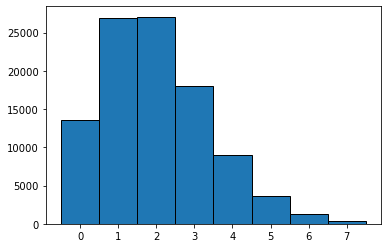

In [3]:
# visualize the distribution
plt.hist(dist.rvs(n_simulations), bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.show()

#### 1a. What is the probability that no cars drive up in the noon hour?

In [4]:
# experimental
(dist.rvs(n_simulations) == 0).mean()

0.13409

In [5]:
# theoretical
dist.pmf(0)

0.1353352832366127

#### 1b. What is the probability that 3 or more cars come through the drive through?

In [6]:
# experimental
(dist.rvs(n_simulations) >= 3).mean()

0.32311

In [7]:
# theoretical
dist.sf(2)

0.32332358381693654

#### How likely is it that the drive through gets at least 1 car?

In [8]:
# experimental
(dist.rvs(n_simulations) >= 1).mean()

0.86403

In [9]:
# theoretical
dist.sf(0)

0.8646647167633873

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [10]:
# establish variables
n_simulations = 1_000_000

μ = 3
σ = .3

dist = stats.norm(μ, σ)

df = pd.DataFrame(np.random.normal(µ, σ, size=n_simulations)).sort_values(by=0)

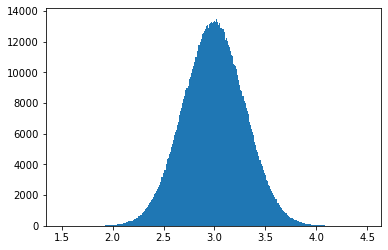

In [11]:
# visualize the distribution
plt.hist(dist.rvs(n_simulations), bins=np.arange(1.5, 4.5, .01), align='left', width=.01)
plt.show()

#### 2a. What grade point average is required to be in the top 5% of the graduating class?

In [12]:
# experimental
df.iloc[int(n_simulations * .95)][0]

3.49339247471563

In [13]:
# theoretical
dist.ppf(.95)

3.4934560880854417

#### 2b. What GPA constitutes the bottom 15% of the class?

In [14]:
# experimental
df.iloc[int(n_simulations * .15)][0]

2.688575271677318

In [15]:
# theoretical
dist.ppf(.15)

2.689069983151863

#### 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [16]:
# experiemntal 
min = df.iloc[int(n_simulations * .2)][0]
max = df.iloc[int(n_simulations * .3)][0]
gpa = 2.8

2.8 > min and 2.8 < max

True

In [17]:
# theoretical
min = dist.ppf(.2)
max = dist.ppf(.3)
gpa = 2.8

2.8 > min and 2.8 < max

True

#### 2d. If I have a GPA of 3.5, what percentile am I in?

In [18]:
# experimental
(df < 3.5).mean()

0    0.952217
dtype: float64

In [19]:
# theoretical
dist.cdf(3.5)

0.9522096477271853

#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?


In [20]:
# establish variables
n_simulations = 1_000_000
n_trials = 4326
p = .02
dist = stats.binom(n_trials, p)

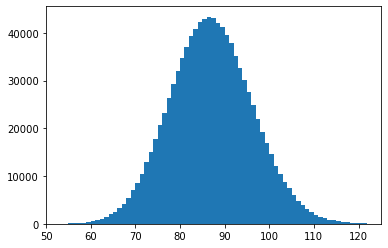

In [21]:
# visualize the distribiution
plt.hist(dist.rvs(n_simulations), bins=range(0,180,1), width=1)
plt.xlim(50, 125)
plt.show()

In [22]:
# experimental
(dist.rvs(n_simulations) >= 97).mean()

0.13951

In [23]:
# theoretical
dist.sf(96)

0.13975823631416445

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question. What is the probability that at least one of your first 60 answers is correct?


In [24]:
# establish variables
n_simulations = 1_000_000
n_trials = 60
p = 1/101
dist = stats.binom(n_trials, p)

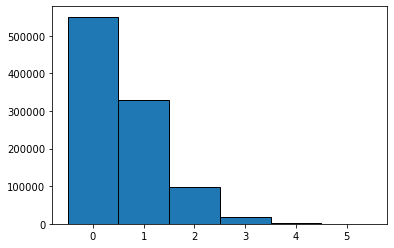

In [25]:
# visualize the distribution
plt.hist(dist.rvs(n_simulations), bins=range(7), width=1, align='left', ec='black')
plt.show()

In [26]:
# experimental
(dist.rvs(n_simulations) >= 1).mean()

0.450271

In [27]:
# theoretical
dist.sf(0)

0.44955038406224

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

In [28]:
# establish variables
n_simulations = 100_000
n_trials = int((.9 * 3 * 22)) # number of students visit each day
p = .03

def dist(days=1):
    return stats.binom(n_trials * days, p)

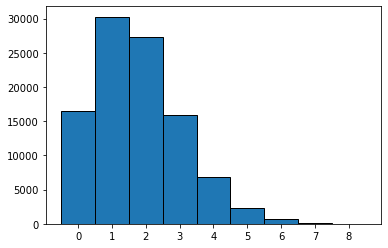

In [29]:
# visualize the distribution
plt.hist(dist(days=1).rvs(n_simulations), bins=range(10), width=1, align='left', ec='black')
plt.xticks(range(9))
plt.show()

#### 5a. How likely is it that the break area gets cleaned up each day? 

In [30]:
days = 1

In [31]:
# experimental
(dist(days).rvs(n_simulations) > 0).mean()

0.8357

In [32]:
# theoretical
dist(days).sf(0)

0.8342199288437352

In [33]:
# theoretical
1 - dist(days).pmf(0)

0.8342199288437355

In [34]:
# theoretical
1 - (.97 ** n_trials * days)

0.8342199288437355

#### 5b. How likely is it that it goes two days without getting cleaned up? 


In [35]:
days = 2

In [36]:
# experimental
(dist(days).rvs(n_simulations) == 0).mean()

0.02738

In [37]:
# theoretical
dist(days).pmf(0)

0.027483031992576134

In [38]:
# theoretical
.97 ** (n_trials * days)

0.027483031992576134

#### 5c. All week?

In [39]:
days = 5

In [40]:
# experimental
(dist(days).rvs(n_simulations) == 0).mean()

8e-05

In [41]:
# theoretical
dist(days).pmf(0)

0.00012521651388091245

In [42]:
# theoretical
.97 ** (n_trials * days)

0.00012521651388091245

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


In [43]:
# establish variables

n_simulations = 10_000

μ = 15  # mean number of people in line at lunch start
σ = 3   # std dev of number of people in line at lunch start

order_time = 2  # 2 minutes for each person to order
wait_time = 10  # 10 minutes from ordering to getting food
lunch_time = 60 # 60 minute lunch break

dist = stats.norm(lunch_time - μ * order_time, σ * order_time)

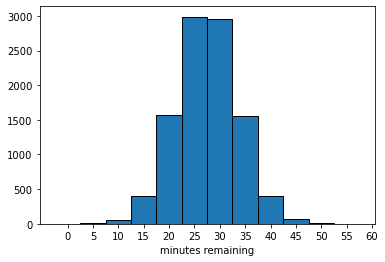

In [44]:
#visualize the distribution
plt.hist(dist.rvs(n_simulations), bins=range(0,61,5), width=5, align='left', ec='black')
plt.xticks(range(0,61,5))
plt.xlabel('minutes remaining')
plt.show()

In [45]:
# experimental 
(dist.rvs(n_simulations) >= 15).mean()

0.9942

In [46]:
# theoretical
dist.sf(15)

0.9937903346742238

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [47]:
from env import get_db_url, user, password, host

In [48]:
# get the data
url = get_db_url('employees')
sql = '''SELECT salary 
           FROM salaries
           WHERE to_date > NOW()'''

salaries = pd.DataFrame(pd.read_sql(sql, url))

In [49]:
# establish variables
μ = salaries.mean()
σ = salaries.std()
dist = stats.norm(µ, σ)

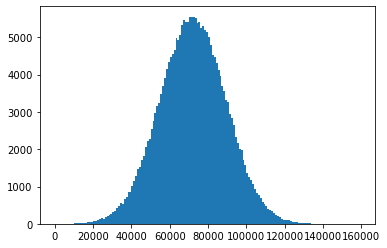

In [50]:
# visualize the distribution: theoretical normal distribution
plt.hist(dist.rvs(len(salaries)), bins=range(0,160_000,1000), width=1000)
plt.show()

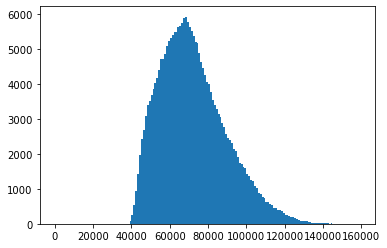

In [51]:
# visualize the distribution: actual observed values
plt.hist(salaries, bins=range(0,160_000,1000), width=1000)
plt.show()

#### 7a. What percent of employees earn less than 60,000?

In [52]:
# based on a theoretical normal distribution
dist.cdf(60_000)[0]

0.24385742480214434

In [53]:
# actual observed values
len(salaries[salaries.salary < 60_000]) / len(salaries)

0.2705727041028802

#### 7b. What percent of employees earn more than 95,000?

In [54]:
# based on normal distribution
dist.sf(95_000)[0]

0.09208819199804058

In [55]:
# actual observed values
len(salaries[salaries.salary > 95_000]) / len(salaries)

0.1086272092752078

#### 7c. What percent of employees earn between 65,000 and 80,000?

In [56]:
# based on a normal distribution
(dist.cdf(80_000)[0]
- dist.cdf(65_000)[0])

0.33506056854466654

In [57]:
# actual observed values 
len(salaries[salaries.salary >= 65_000]
            [salaries.salary <= 80_000]) / len(salaries)

/var/folders/zb/3lg9b5xn3831bhkh23bd5bs00000gn/T/ipykernel_70704/492890421.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(salaries[salaries.salary >= 65_000]


0.32515700221552196

#### 7d. What do the top 5% of employees make?

In [58]:
# based on a normal distribution
dist.isf(.05)[0]

100484.64454102777

In [59]:
# actual observed values
idx_95 = int(len(salaries) * .95 - 1) # 95th percentile index
salaries.sort_values(by='salary').iloc[idx_95:].min()[0]

104225